<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_8/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Дискретная модель линии передачи. Уравнения возбуждения. Возбуждение ЛП гармоническим сигналом.</h1>

<h2>Получить сигналы и их спектры на входе и выходе линии передачи при возбуждении ее гармоническим сигналом.</h2>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Параметры линии передачи</h3>

In [29]:
# параметры линии передачи
R = 50  # сопротивление
L = 10e-6  # индуктивность
C = 10e-9  # ёмкость
Z0 = np.sqrt(L / C)  # волновое сопротивление

<h3>Параметры сигнала</h3>

In [30]:
f0 = 1e6  # частота
A = 1  # амплитуда

<h3>Генерируем гармонический сигнал</h3>

In [31]:
t = np.linspace(0, 10 / f0, num=1000)
x_in = A * np.sin(2 * np.pi * f0 * t)

<h3>Считаем спектр на входе</h3>

In [32]:
X_in = np.fft.fft(x_in)
freq = np.fft.fftfreq(len(t), t[1] - t[0])

<h3>Моделируем линию передачи</h3>

In [33]:
w = 2 * np.pi * freq
ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)
Gamma = (ZL - Z0) / (ZL + Z0)
x_out = A * (1 - Gamma) * np.exp(1j * w * t)
X_out = np.fft.fft(x_out)

<ipython-input-33-387732d2ffb3>:2: RuntimeWarning: divide by zero encountered in true_divide
  ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)
<ipython-input-33-387732d2ffb3>:2: RuntimeWarning: invalid value encountered in true_divide
  ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)


<h3>Выводим графики</h3>

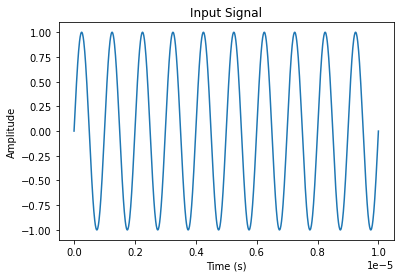

In [34]:
plt.plot(t, x_in)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()

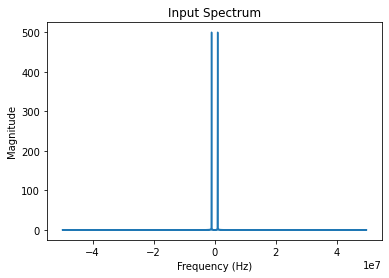

In [35]:
plt.plot(freq, np.abs(X_in))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Input Spectrum')
plt.show()

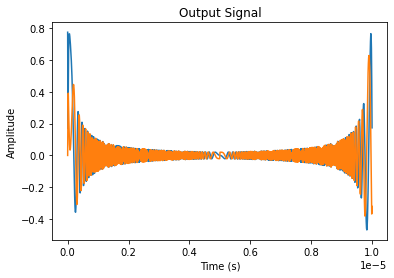

In [36]:
plt.plot(t, np.real(x_out), label='Real')
plt.plot(t, np.imag(x_out), label='Imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.show()

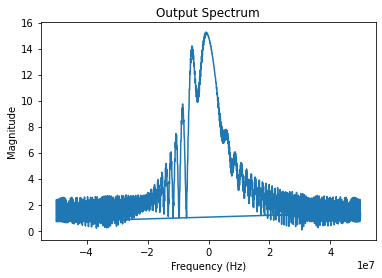

In [37]:
plt.plot(freq, np.abs(X_out))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Output Spectrum')
plt.show()

<h2>Получить сигналы и их спектры на входе и выходе линии передачи при возбуждении ее широкополосным импульсом.</h2>

In [38]:
from scipy.signal import gaussian, chirp

<h3>Параметры линии передачи</h3>

In [39]:
R = 50  # сопротивление
L = 10e-6  # индуктивность
C = 10e-9  # ёмкость
Z0 = np.sqrt(L / C)  # волновое сопротивление

<h3>Параметры импульса</h3>

In [40]:
f0 = 1e6  # центральная частота
B = 10e6  # ширина спектра
t_peak = 1 / f0  # время пика импульса
n = 1000  # количество отсчетов

<h3>Генерируем импульс</h3>

In [41]:
t = np.linspace(0, 10 / f0, num=n)
envelope = gaussian(n, std=n/6)
signal = chirp(t, f0 - B/2, t_peak, f0 + B/2, method='linear') * envelope

<h3>Считаем спектр на входе</h3>

In [42]:
X_in = np.fft.fft(signal)
freq = np.fft.fftfreq(n, t[1] - t[0])

<h3>Моделируем линию передачи и считаем спектр на выходе</h3>



In [43]:
w = 2 * np.pi * freq
ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)
Gamma = (ZL - Z0) / (ZL + Z0)
output = signal * (1 - Gamma) * np.exp(1j * w * t)
X_out = np.fft.fft(output)

<ipython-input-43-b4ca770bd21f>:2: RuntimeWarning: divide by zero encountered in true_divide
  ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)
<ipython-input-43-b4ca770bd21f>:2: RuntimeWarning: invalid value encountered in true_divide
  ZL = R + 1j * w * L + np.where(w != 0, 1 / (1j * w * C), 0)


<h3>Выводим полученные графики</h3>

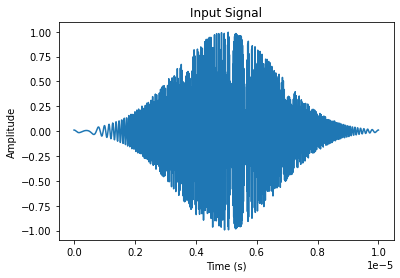

In [44]:
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()

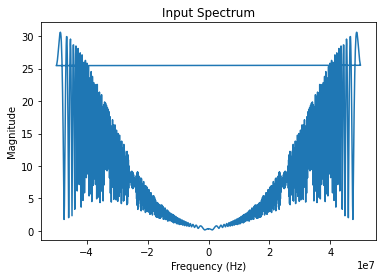

In [45]:
plt.plot(freq, np.abs(X_in))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Input Spectrum')
plt.show()

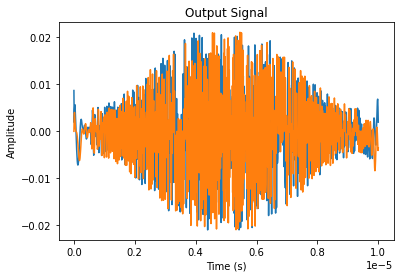

In [46]:
plt.plot(t, np.real(output), label='Real')
plt.plot(t, np.imag(output), label='Imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.show()

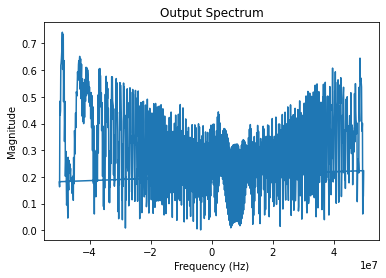

In [47]:
plt.plot(freq, np.abs(X_out))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Output Spectrum')
plt.show()

<h2>Дополнительное задание: в качестве возбуждающего сигнала задать квазипрямоугольный импульс, например, в форме трапеции (импульс с передним и задним фронтами). Рассмотреть влияние параметра проводимости G на входной и выходной импульсные сигналы, т.е. построить графики распределения сигналов во временной и частотной областях для трех значений параметра G: G=0, G=0.01, G=1.</h2>